In [ ]:
#intalling keras tuner

!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import kerastuner
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-2-4605ccf0440e>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [ ]:
tf.__version__

'2.9.2'

In [ ]:
#importing fashion dataset with 10 classes

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

<function matplotlib.pyplot.show(*args, **kw)>

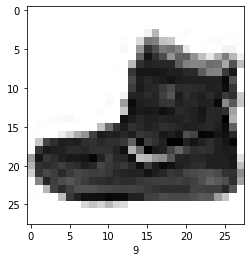

In [ ]:
#how the images look like

plt.imshow(x_train[0], cmap='binary')
plt.xlabel(y_train[0])
plt.show

In [ ]:
def create_model():
  num_hidden_layers = 1 #hyperparameter value
  num_units = 8
  dropout_rate = 0.1
  learning_rate = 0.01


  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  model.add(tf.keras.layers.Lambda(lambda x: x/255.)) #normalizes the input

  for _ in range(0, num_hidden_layers):
    model.add(tf.keras.layers.Dense(num_units, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
  
  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

  model.compile(
      loss = 'sparse_categorical_crossentropy',
      optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
  )
  
  return model

In [ ]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_model(hp):
  num_hidden_layers = 1 #hyperparameter value
  num_units = 8
  dropout_rate = 0.1
  learning_rate = 0.01

  if hp:
    num_hidden_layers = hp.Choice('num_hidden_layers', values = [1, 2, 3])
    num_units = hp.Choice('num_units', values = [8, 16, 32])
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5)
    learning_rate = hp.Float('learning_rate', min_value=0.001, max_value=0.01)


  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  model.add(tf.keras.layers.Lambda(lambda x: x/255.)) #normalizes the input

  for _ in range(0, num_hidden_layers):
    model.add(tf.keras.layers.Dense(num_units, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
  
  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

  model.compile(
      loss = 'sparse_categorical_crossentropy',
      optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
      metrics=['accuracy']
  )
  
  return model

In [ ]:
create_model(None).summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 lambda_1 (Lambda)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class CustomTuner(kerastuner.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 32, 128, step = 32)
    super(CustomTuner, self).run_trial(trial, *args, **kwargs)

    return super(CustomTuner, self).run_trial(trial, *args, **kwargs)

In [ ]:
#creating a instance object of our class CustomTuner

tuner = CustomTuner(
    create_model,
    objective='val_accuracy', #objective is to maximize validation accuracy
    max_trials=20,
    directory='logs', #saving the logs in a directory
    project_name='fashion_mnist',
    overwrite=True
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
num_units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32], 'ordered': True}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': None, 'sampling': None}


In [ ]:
#similar to model.fir funtion
tuner.search(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=5, verbose=False    
)

In [ ]:
tuner.results_summary(1)

Results summary
Results in logs/fashion_mnist
Showing 1 best trials
Trial summary
Hyperparameters:
num_hidden_layers: 1
num_units: 32
dropout_rate: 0.1
learning_rate: 0.001
batch_size: 32
Score: 0.8657000064849854


In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20, batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/20


TypeError: ignored